In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = float(0)
    for i in range(m):
        y_hat = (w * x[i]) + b
        cost += (y_hat - y[i]) ** 2
    cost = cost / (2 * m)
    print(f"cost = {cost}")
    return cost

In [50]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = dj_db = float(0)
    for i in range(m):
        y_hat = (w * x[i]) + b
        dj_dw_i = (y_hat - y[i]) * x[i]
        dj_db_i = (y_hat - y[i]) 
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

In [2]:
td = pd.read_csv("training_data.csv")
tds = td.head(10)
xi = tds['Square_Footage'].to_numpy(dtype='float')
yi = tds['Price'].to_numpy(dtype='float')
print(f"xi = {xi}")
print(f"yi = {yi}")
print(f"m = {xi.shape[0]}")

xi = [1360. 4272. 3592.  966. 4926. 3944. 3671. 3419.  630. 2185.]
yi = [234226. 499828. 435910. 164402. 561384. 478678. 475777. 389400. 147015.
 320336.]
m = 10


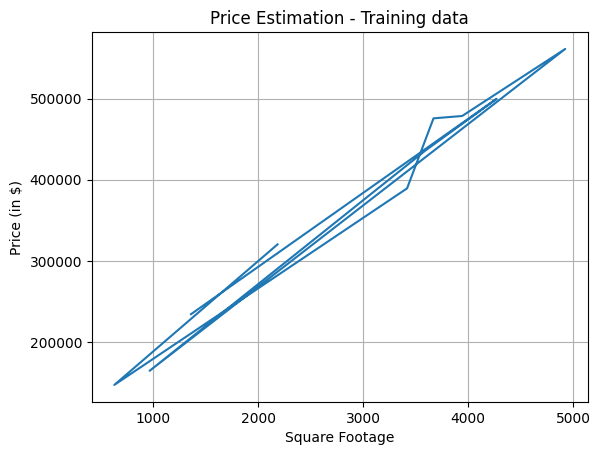

In [3]:
plt.plot(xi, yi, label='Price vs Square Footage')
plt.title("Price Estimation - Training data")
plt.xlabel("Square Footage")
plt.ylabel("Price (in $)")
plt.grid()
plt.show()

In [ ]:
w = b = float(0)
EPOCH = 10000
alpha = 0.01
wbs = list()
jwbs = list()
for i in range(1, EPOCH + 1):
    dj_dw, dj_db = compute_gradient(xi, yi, w, b)
    w = w - (alpha * dj_dw)
    b = b - (alpha * dj_db)
    cost = compute_cost(xi, yi, w, b)
    wbs.append((w, b))
    jwbs.append(cost)
    if i % 500 == 0:
        print(f"Iteration {i} :: Cost = {cost} :: dj_dw = {dj_dw} :: dj_db = {dj_db} :: w = {float(w)} :: b = {float(b)}")

In [ ]:
plt.plot(wbs[:100], jwbs[:100], label="Cost vs model parameters")
plt.xlabel("Model parameters - (w, b)")
plt.ylabel("Cost function for linear regression")
plt.grid()
plt.show()